In [51]:
import numpy as np
import matplotlib.pyplot as plt
import numpy_financial as npf
import pandas as pd

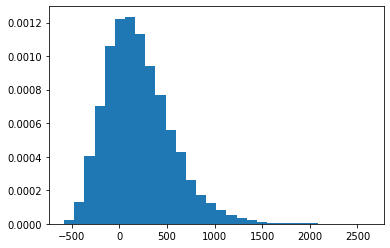

204.02751225731566


In [4]:
mu, sigma = .2, .28
days = 365
daily_mu = np.power((mu+1),(1/days)) - 1
daily_sigma = sigma/np.sqrt(days)

n = 10_000

pl = []

for _ in range(n):
      dist = np.random.normal(daily_mu,daily_sigma,days)
      dist = dist+1
      pl.append((dist.prod()-1) * 1_000)
pl = np.array(pl)
plt.hist(pl, 30, density=True)
plt.show()
print(pl.mean())


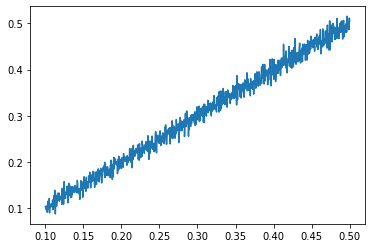

In [5]:
np.linspace(.1,.2,n)

mu, sigma = .2, .28
n = 1_000

mu_series = np.linspace(.1,.5,n)

days = 365
daily_mu_series = np.power((mu_series+1),(1/days)) - 1
daily_sigma = sigma/np.sqrt(days)
mu_pl = []
for mu, daily_mu in zip(mu_series,daily_mu_series):
  # print(mu)
  pl= np.array(0)
  for _ in range(n):
    dist = np.random.normal(daily_mu,daily_sigma,days)
    dist = dist+1
    pl = np.append(pl,(dist.prod()-1))
  mu_pl.append(pl.mean())

plt.plot(mu_series, mu_pl)

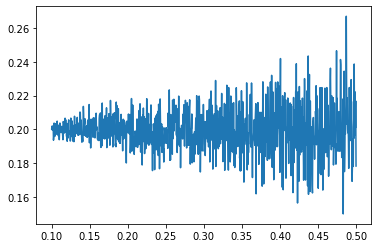

In [6]:
np.linspace(.1,.2,n)

mu, sigma = .2, .28
n = 1_000

# mu_series = np.linspace(.1,.5,n)
sigma_series = np.linspace(.1,.5,n)

days = 365
daily_mu = np.power((mu+1),(1/days)) - 1
daily_sigma_series = sigma_series/np.sqrt(days)
sigma_pl = []
for sigma, daily_sigma in zip(sigma_series,daily_sigma_series):
  # print(sigma)
  pl= np.array(0)
  for _ in range(n):
    dist = np.random.normal(daily_mu,daily_sigma,days)
    dist = dist+1
    pl = np.append(pl,(dist.prod()-1))
  sigma_pl.append(pl.mean())

plt.plot(sigma_series, sigma_pl)

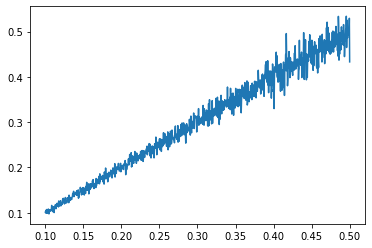

In [7]:
np.linspace(.1,.2,n)

mu, sigma = .2, .28
n = 1_000

mu_series = np.linspace(.1,.5,n)
sigma_series = np.linspace(.1,.5,n)

days = 365
daily_mu = np.power((mu+1),(1/days)) - 1
daily_sigma = sigma/np.sqrt(days)
sigma_pl = []
for sigma in sigma_series:
#   print(sigma)
  mu = sigma
  daily_mu = np.power((mu+1),(1/days)) - 1
  daily_sigma = sigma/np.sqrt(days)
  pl= np.array(0)
  for _ in range(n):
    dist = np.random.normal(daily_mu,daily_sigma,days)
    dist = dist+1
    pl = np.append(pl,(dist.prod()-1))
  sigma_pl.append(pl.mean())

plt.plot(sigma_series, sigma_pl)

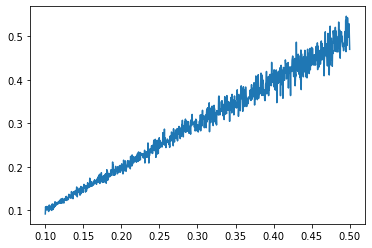

In [8]:
np.linspace(.1,.2,n)

mu, sigma = .2, .28
n = 1_000

mu_series = np.linspace(.1,.5,n)
sigma_series = np.linspace(.1,.5,n)

days = 365
daily_mu = np.power((mu+1),(1/days)) - 1
daily_sigma = sigma/np.sqrt(days)
sigma_pl = []
for sigma in sigma_series:
#   print(sigma)
  mu = sigma
  daily_mu = np.power((mu+1),(1/days)) - 1
  daily_sigma = sigma/np.sqrt(days)
  pl= np.array(0)
  for _ in range(n):
    dist = np.random.normal(daily_mu,daily_sigma,days)
    dist = dist+1
    pl = np.append(pl,(dist.prod()-1))
  sigma_pl.append(pl.mean())

plt.plot(sigma_series, sigma_pl)

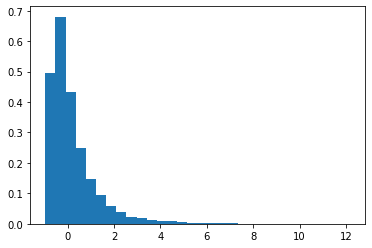

0.20903114198613726
1.112971088019935


In [9]:
mu, sigma = .2, .8
days = 365
daily_mu = np.power((mu+1),(1/days)) - 1
daily_sigma = sigma/np.sqrt(days)

n = 10_000

pl = []

for _ in range(n):
      dist = np.random.normal(daily_mu,daily_sigma,days)
      dist = dist+1
      pl.append(dist.prod()-1)
pl = np.array(pl)
plt.hist(pl, 30, density=True)
plt.show()
print(pl.mean())
print(pl.std())


In [10]:
pl.mean()

0.20903114198613726

In [11]:
pl.std()

1.112971088019935

In [12]:
from scipy.stats import norm





BTC	 -> -3.904082033286538
NIFTY	 -> 19.51198974583918
Debt	 -> 19.475599487291962


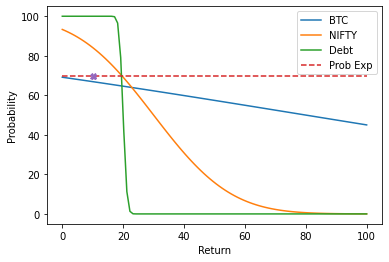

In [13]:
expected_returns = np.linspace(0,1,100)*100
goal_return = 10
goal_prob = 70
z_value = norm.ppf((100-goal_prob)/100)
instruments = [{'name':'BTC','mu':.8,'sigma':1.6,'cdf':[],'return_offered':0},
                {'name':'NIFTY','mu':.3,'sigma':.2,'cdf':[],'return_offered':0},
                {'name':'Debt','mu':.2,'sigma':.01,'cdf':[],'return_offered':0}]

for expected_return in expected_returns:
    for instrument in instruments:
        instrument['cdf'].append(round((1-norm(instrument['mu'], instrument['sigma']).cdf(expected_return/100))*100,4))
        
legends = []
for instrument in instruments:
    plt.plot(expected_returns,instrument['cdf'])
    legends.append(instrument['name'])
    instrument['return_offered'] = (instrument['mu'] + instrument['sigma']*z_value)*100
    print(f"""{instrument['name']}\t -> {instrument['return_offered']}""")

plt.plot(expected_returns,np.ones(len(expected_returns))*goal_prob,"--")
legends.append('Prob Exp')

# plt.plot(np.ones(len(expected_returns))*goal_return,np.linspace(0,100,len(expected_returns)),"--")
# legends.append('Return Exp')

plt.plot(goal_return,goal_prob,"X")


plt.legend(legends)
plt.xlabel("Return")
plt.ylabel("Probability")
plt.show()

In [14]:
instruments[0]['mu']
instruments[0]['sigma']*z_value

-0.8390408203328654

In [15]:
goal_prob = 70

z_value = norm.ppf((100-goal_prob)/100)
z_value

-0.5244005127080409

In [16]:
norm.ppf(goal_prob/100)

0.5244005127080407

In [17]:
instruments = [{'name':'NIFTY','mu':.1146,'sigma':.1733},
                {'name':'Small','mu':.16,'sigma':.3}]

In [18]:
inv = 50_000
low = 40_000
high = 100_000

t = 3

confidence = .95

rf = .1

In [19]:
pv = inv
r_low = np.power(low/inv,1/t) - 1
r_high = np.power(high/inv,1/t) - 1

pv_low = low / np.power(1+rf,t-1)
pv_high = high / np.power(1+rf,t-1)

r_fall_to_low = pv_low / inv - 1
r_jump_to_high = pv_high / inv - 1 

In [20]:
# Search for instrument with best return

best_return = -np.inf
best_return_idx = None
for i in range (len(instruments)):
    prob_of_falling_to_low = norm(instruments[i]['mu'], instruments[i]['sigma']).cdf(r_fall_to_low)    
    if (prob_of_falling_to_low < (1-confidence)) & (instruments[i]['mu']>best_return):
        best_return = instruments[i]['mu']
        best_return_idx = i
    print(f'''{instruments[i]['name']} \t {prob_of_falling_to_low}''')
    
instruments[best_return_idx]['name']

NIFTY 	 0.004441553562748352
Small 	 0.0481752454117313


'Small'

In [21]:
np.random.seed(42)
ti_return = np.random.normal(loc=instruments[best_return_idx]['mu'],scale=instruments[best_return_idx]['sigma'])
fv = pv * (1+ti_return)
print(fv)

65450.71229516849


In [168]:
def to_currency (value, multiplier=100, add_currency_symbol=True, currency_symbol = '₹',rounding=0):
    negative_sign = ""
    if value < 0:
        negative_sign = "-"
        value = abs(value)
    value = round(value,rounding)
    decimal_value = round(value%1,rounding)
    value = int(round((value-decimal_value),0))
    if decimal_value == 0:
        currency_string = "" 
    else:
        currency_string = "." + str(decimal_value)[2:]
    base = 1_000
    set = value%base
    currency_string = str(int(round(set,0))) + currency_string
    if (len(str(set)) < len(str(value))) & (len(str(set)) < len(str(base))-1):
        zeros = "".join(['0' for _ in range(len(str(base))-1-len(str(set)))])
        currency_string = zeros + currency_string
        
    converted_value = set
    if set == value:
        if add_currency_symbol:
            return currency_symbol + " " + negative_sign + currency_string
        else: 
            return negative_sign + currency_string
    else:
        while converted_value != value:
            base = base * multiplier
            set = int(round((value%base - converted_value)/base * multiplier,0))
            currency_string = str(int(set)) + "," + currency_string
            if (len(str(int(round(set*base/multiplier,0)))) < len(str(value))) & (len(str(set)) < len(str(multiplier))-1):
                zeros = "".join(['0' for _ in range(len(str(multiplier))-1-len(str(set)))])
                currency_string = zeros + currency_string
            converted_value = int(round(converted_value + (set*base/multiplier),0))

    if add_currency_symbol:
        return currency_symbol + " " + negative_sign + currency_string
    else: 
        return negative_sign + currency_string

to_currency(-78361.78264643789, multiplier=100,rounding=0, add_currency_symbol=True)

'₹ -78,362'

In [47]:
instruments = [{'name':'NIFTY','mu':.1146,'sigma':.1733},
                {'name':'Risk Free','mu':.06,'sigma':.000000001}]

verbose = 1

inv = 100_000
low = 180_000

t = 10
confidence = .95
rf = instruments[-1]['mu']
pv_low = npf.pv(rf,t,pmt=0,fv=-low)

if pv_low > inv:
    print("Please take more risk to achieve this goal")
else:
    np.random.seed(43)

    pv = inv

    for ti in range(1,t+1):
        if verbose == 2:
            print(f"""Year - {ti}""")
        pv_low = npf.pv(rf,t-ti+1,pmt=0,fv=-low)
        # pv_low = low / np.power(1+rf,t-ti+1)
        r_fall_to_low = pv_low / pv - 1
        if verbose == 2:
            print(f"""\tPV = {to_currency(pv)}\n\tPV Low ({t-ti+1} years to go) = {to_currency(pv_low)}\n\tSearching for best Instrument""")

        best_return = -np.inf
        best_return_idx = None
        found_best_instrument = False
        for i in range (len(instruments)):
            prob_of_falling_to_low = norm(instruments[i]['mu'], instruments[i]['sigma']).cdf(r_fall_to_low)   
            if (prob_of_falling_to_low < (1-confidence)) & (instruments[i]['mu']>best_return):
                best_return = instruments[i]['mu']
                best_return_idx = i
            if verbose == 2:
                print(f'''\t\t{instruments[i]['name']} \t {round(prob_of_falling_to_low*100,2)}%''')
            
        if verbose == 2:
            print(f'''\t\tSelected Instrument: {instruments[best_return_idx]['name']}''')

        ti_return = np.random.normal(loc=instruments[best_return_idx]['mu'],scale=instruments[best_return_idx]['sigma'])
        fv = pv * (1+ti_return)
        if verbose == 2:
            print(f'''\tReturn in Year {ti}: {round(ti_return*100,2)}%\n\tFV = {to_currency(fv)}''')
        elif verbose == 1:
            print(f"""Year - {ti}\t {to_currency(pv)} in {instruments[best_return_idx]['name']} @ {round(ti_return*100,2)}% \t-> {to_currency(fv)}""")

        pv = fv
        



Please take more risk to achieve this goal


In [192]:
instruments = [{'name':'NIFTY','mu':.1146,'sigma':.1733},
                {'name':'Risk Free','mu':.06,'sigma':.000000001}]

instruments = pd.DataFrame(instruments)
np.random.seed(43)


verbose = 1

downpayment = 100_000
emi = 5_000
low = 150_000
total_number_of_payments = 11
iterations_per_period = 12
payment_in_n_iterations = 1
confidence = .95
total_periods = 1
t = total_periods * iterations_per_period

cashflows = np.zeros(t)
cashflows = np.insert(cashflows,0,downpayment)

cashflows[[i for i in range(payment_in_n_iterations,t,payment_in_n_iterations)]]  = emi


instruments['mu_iter'] = np.power(1+instruments['mu'],1/iterations_per_period) - 1
instruments['sigma_iter'] = instruments['sigma'] / np.sqrt(iterations_per_period)
rf = instruments['mu_iter'].iloc[-1]
inv = npf.npv(rf,cashflows)
pv_low = npf.pv(rf,t,pmt=0,fv=-low)

if pv_low > inv:
    print("Please take more risk to achieve this goal")
else:
    np.random.seed(43)

    pv = 0

    for ti in range(0,t):
        tplus_pv_future_cashflows = npf.npv(rf,cashflows[ti+1:])
        tplus_pv_low = npf.pv(rf,t-ti+1,pmt=0,fv=-low)
        safe_tplus_pv = tplus_pv_low - tplus_pv_future_cashflows
        
        if verbose == 2:
            print(f"""Iter - {ti}""")
            print(f"""\tPV = {to_currency(pv)} + {to_currency(cashflows[ti])} = {to_currency(pv + cashflows[ti])}\n\tSafe PV Low ({t-ti} iters to go) = {to_currency(safe_tplus_pv)}\n\tSearching for best Instrument""")

        pv = pv + cashflows[ti]
        r_fall_to_low = safe_tplus_pv / pv - 1
        best_return = -np.inf
        best_return_instrument = None
        found_best_instrument = False
        for idx, instrument in instruments.iterrows():
            prob_of_falling_to_low = norm(instrument['mu_iter'], instrument['sigma_iter']).cdf(r_fall_to_low)   
            if (prob_of_falling_to_low < (1-confidence)) & (instrument['mu_iter']>best_return):
                best_return = instrument['mu_iter']
                best_return_instrument = instrument.copy()
            if verbose == 2:
                print(f'''\t\t{instrument['name']} \t {round(prob_of_falling_to_low*100,2)}%''')
            
        if verbose == 2:
            print(f'''\t\tSelected Instrument: {best_return_instrument['name']}''')

        ti_return = np.random.normal(loc=best_return_instrument['mu_iter'],scale=best_return_instrument['sigma_iter'])
        fv = pv * (1+ti_return)
        if verbose == 2:
            print(f'''\tReturn in iter {ti}: {round(ti_return*100,2)}% = {to_currency(pv * ti_return)}\n\tFV = {to_currency(pv)} + {to_currency(pv * ti_return)} = {to_currency(fv)}''')
        elif verbose == 1:
            print(f"""Iter - {ti}\t {to_currency(pv-cashflows[ti])} + {to_currency(cashflows[ti])} \t in {best_return_instrument['name']} @ {round(ti_return*100,2)}% \t-> {to_currency(fv)}""")

        pv = fv

print(f'''Portfolio of {to_currency(pv)}, compared to low of {to_currency(low)} and  {to_currency(npf.fv(rf,t,pmt=0,pv=-inv))} by fixed return''')
        



Iter - 0	 ₹ 0 + ₹ 1,00,000 	 in NIFTY @ 2.2% 	-> ₹ 1,02,196
Iter - 1	 ₹ 1,02,196 + ₹ 5,000 	 in NIFTY @ -3.64% 	-> ₹ 1,03,298
Iter - 2	 ₹ 1,03,298 + ₹ 5,000 	 in NIFTY @ -0.99% 	-> ₹ 1,07,230
Iter - 3	 ₹ 1,07,230 + ₹ 5,000 	 in NIFTY @ -1.77% 	-> ₹ 1,10,246
Iter - 4	 ₹ 1,10,246 + ₹ 5,000 	 in Risk Free @ 0.49% 	-> ₹ 1,15,807
Iter - 5	 ₹ 1,15,807 + ₹ 5,000 	 in Risk Free @ 0.49% 	-> ₹ 1,21,395
Iter - 6	 ₹ 1,21,395 + ₹ 5,000 	 in Risk Free @ 0.49% 	-> ₹ 1,27,011
Iter - 7	 ₹ 1,27,011 + ₹ 5,000 	 in Risk Free @ 0.49% 	-> ₹ 1,32,653
Iter - 8	 ₹ 1,32,653 + ₹ 5,000 	 in Risk Free @ 0.49% 	-> ₹ 1,38,323
Iter - 9	 ₹ 1,38,323 + ₹ 5,000 	 in Risk Free @ 0.49% 	-> ₹ 1,44,021
Iter - 10	 ₹ 1,44,021 + ₹ 5,000 	 in Risk Free @ 0.49% 	-> ₹ 1,49,746
Iter - 11	 ₹ 1,49,746 + ₹ 5,000 	 in Risk Free @ 0.49% 	-> ₹ 1,55,500
Portfolio of ₹ 1,55,500, compared to low of ₹ 1,50,000 and  ₹ 1,62,633 by fixed return


116221.66629154612

In [171]:
cashflows

array([100000.,      0.,      0.,      0.,      0.,   5000.,      0.,
            0.,      0.,      0.,   5000.,      0.,      0.])

In [141]:
instruments

,name,mu,sigma
0,NIFTY,0.1146,1.733000e-01
1,Risk Free,0.0600,1.000000e-09


In [108]:
instruments = [{'name':'NIFTY','mu':.1146,'sigma':.1733},
                {'name':'Risk Free','mu':.06,'sigma':.000000001}]

instruments = pd.DataFrame(instruments)

downpayment = 200
emi = 100
total_number_of_payments = 3
iterations_per_period = 12
payment_in_n_iterations = 3
total_iterations = (total_number_of_payments+1)*payment_in_n_iterations

cashflows = np.zeros(total_iterations-1)
cashflows = np.insert(cashflows,0,downpayment)

cashflows[[i for i in range(payment_in_n_iterations,total_iterations,payment_in_n_iterations)]]  = emi
cashflows


array([200.,   0.,   0., 100.,   0.,   0., 100.,   0.,   0., 100.,   0.,
         0.])

In [147]:

instruments

,name,mu,sigma,mu_iter,sigma_iter
0,NIFTY,0.1146,1.733000e-01,0.009082,5.002740e-02
1,Risk Free,0.0600,1.000000e-09,0.004868,2.886751e-10


In [82]:
np.array([0,0,100,0,0,100,0,0,100])

array([  0,   0, 100,   0,   0, 100,   0,   0, 100])

In [77]:
np.insert(a,[2,3],[100])

array([  1,   2, 100,   3, 100,   4,   5,   6])

In [85]:
all = {i for i in range(1,12)}
all

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [86]:
threes = {i for i in range(3,12,3)}
threes

{3, 6, 9}

In [88]:
k = all - threes
np.array(k)

array({1, 2, 4, 5, 7, 8, 10, 11}, dtype=object)